# Computational Learning HW1 

### Import useful packeges

In [ ]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn
from sklearn.linear_model import LinearRegression

### Constants (global variabels)

In [ ]:
sigma = 1 
alphas = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1]
C = 1.5

### Q1

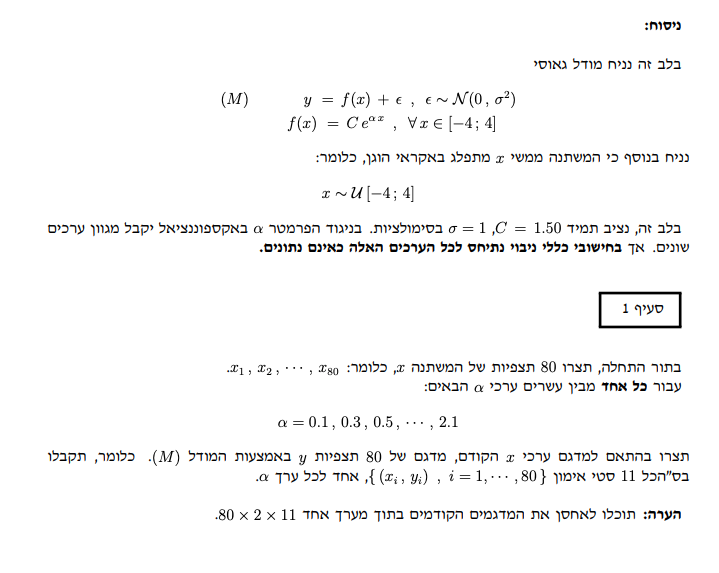

In [ ]:
def create_dataframe():
  """Create a data frame using the global variabels

  Returns
  -------
  DataFrame
      a data frame with N training set containing X,Y,Fx columns
  """
  data = {}

  for alpha in alphas:

    # creating 80 uniform distributed data points
    x = np.random.uniform(-4,4,80)

    # creating 80 noise observation distributed normal with mean = 0 and sd = sigma
    epsilon = np.random.normal(0,sigma**2,80)

    # creating the theotetical function  
    Fx = C*np.exp(alpha*x)

    # creating the theotetical observations   
    y = Fx + epsilon

    # entering each series into dictionary
    data[(alpha, 'X')] = x
    data[(alpha, 'Y')] = y
    data[(alpha, 'Fx')] = Fx

  return pd.DataFrame(data)

In [ ]:
df = create_dataframe()
df.loc[:,pd.IndexSlice[:,['X','Y']]]

0.1                 0.3  ...        1.9       2.1             
           X         Y         X  ...          Y         X            Y
0   1.141231  2.786908  0.141632  ...  -0.296466  0.627444     5.562618
1  -3.889229  2.988247 -1.024475  ...  13.226313  1.185112    19.109206
2   2.554296  1.781155  1.062446  ...  -1.011041  3.589043  2813.326472
3  -0.167108  2.231476  1.998966  ...  -0.987092  0.142373     2.439218
4   0.496773  2.319657  2.695424  ...   0.785274 -2.218111     2.706525
..       ...       ...       ...  ...        ...       ...          ...
75  0.255545  0.786021  2.593551  ...   0.843111  1.384434    26.928069
76 -2.664557  0.236475  3.045424  ...   2.560533 -2.674083    -1.793359
77  2.975646  2.468888 -1.109688  ...   1.137778  0.167241     1.640753
78 -1.549193 -0.386300 -2.391445  ...   0.679627 -3.076924    -0.126359
79  0.712374  2.468528  0.143550  ...   0.618652  1.722869    56.092177

[80 rows x 22 columns]

### Q2

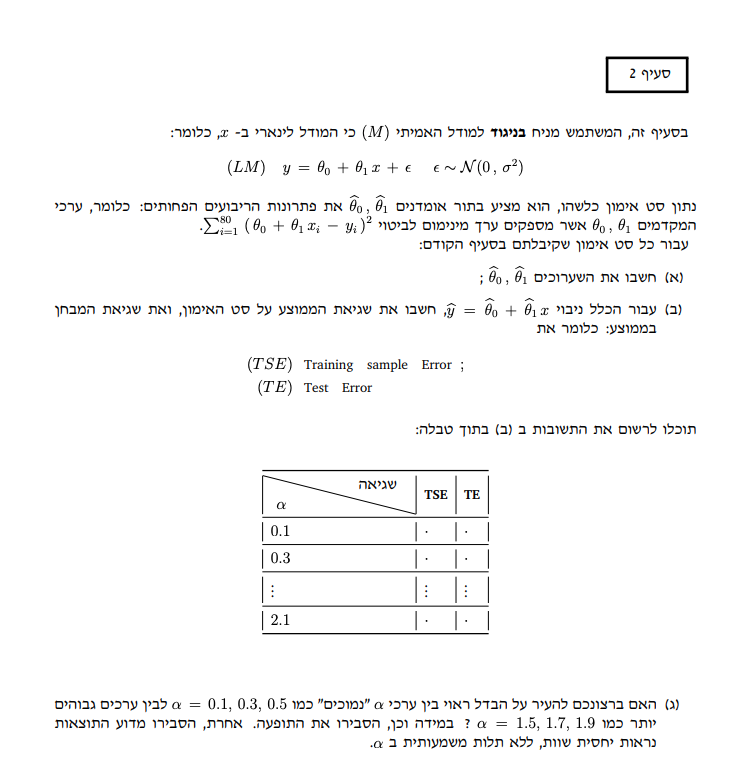

In [ ]:
def linear_models_creation(df):
  """Create multiple linear models for each training set that the input contain, using MSE as loss function

  Parameters
  ----------
  dataFrame : df
      Set of training set contained X,Y,Fx columns
      
  Returns
  -------
  dictionary
      a dictionary of dictionaries with alpha as primer key for each dictionary and all the data model for each alpha store as a value
  """

  # create new dictionary
  training_dict = {}

  # runing on all the primery index
  for alpha in alphas:

    # generate a linear model with MSE as loss function
    lm = LinearRegression()

    # turning each column to a vector
    x = df.loc[:,alpha].iloc[:,0].to_numpy().reshape(80,1)
    y = df.loc[:,alpha].iloc[:,1].to_numpy().reshape(80,1)
    Fx = df.loc[:,alpha].iloc[:,2].to_numpy().reshape(80,1)

    # fit tha best line
    lm.fit(x,y)

    # store all the prediction points
    predictions = lm.predict(x)

    # entering new elemnts into training_dict
    training_dict[alpha] = {'alpha': alpha,'Y': y, 'θ0': float(lm.intercept_),'θ1': float(lm.coef_),'y_predicted':predictions,'TSE':(np.sum((y - predictions)**2))/len(y),'TE': np.mean((Fx-predictions)**2) + sigma**2}
  return training_dict


def linearModelWeights(training_dict):
    """Prints the model and the weights for each training set

    Parameters
    ----------
    dictionary : training_dict
        dictionary of dictionaries with intercept and coefficient
        
    Returns
    -------
    void
    """
    for alpha in alphas:
      θ_0 = training_dict[alpha]['θ0']
      θ_1 = training_dict[alpha]['θ1']
      print('model with alpha :',alpha)                                                                                  
      print("θ0 :",θ_0)
      print("θ1 :",θ_1)
      print(f"y^ = {θ_0} + {θ_1}*x","\n")

#### 2.a)

In [ ]:
training_dict = linear_models_creation(df)
linearModelWeights(training_dict)

model with alpha : 0.1
θ0 : 1.5708691036670057
θ1 : 0.06111720156548641
y^ = 1.5708691036670057 + 0.06111720156548641*x 

model with alpha : 0.3
θ0 : 1.900467073354719
θ1 : 0.5185408641619776
y^ = 1.900467073354719 + 0.5185408641619776*x 

model with alpha : 0.5
θ0 : 2.5933083811100004
θ1 : 0.9916097831924711
y^ = 2.5933083811100004 + 0.9916097831924711*x 

model with alpha : 0.7
θ0 : 3.885305596926326
θ1 : 1.7365639781630788
y^ = 3.885305596926326 + 1.7365639781630788*x 

model with alpha : 0.9
θ0 : 6.680661506069577
θ1 : 4.445884161685665
y^ = 6.680661506069577 + 4.445884161685665*x 

model with alpha : 1.1
θ0 : 12.139409856543105
θ1 : 10.739918964639632
y^ = 12.139409856543105 + 10.739918964639632*x 

model with alpha : 1.3
θ0 : 19.56752228283453
θ1 : 14.390549763463476
y^ = 19.56752228283453 + 14.390549763463476*x 

model with alpha : 1.5
θ0 : 44.14488595158113
θ1 : 26.431902892293067
y^ = 44.14488595158113 + 26.431902892293067*x 

model with alpha : 1.7
θ0 : 103.41424688731766
θ1 

#### 2.b)


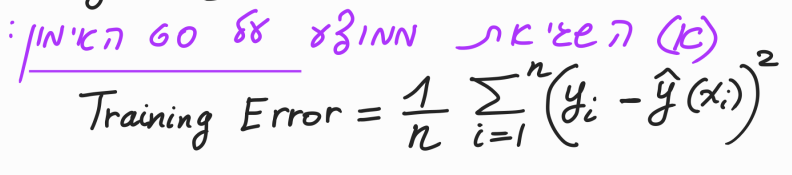

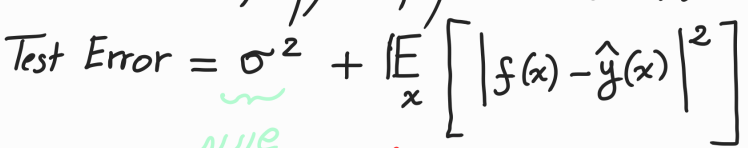

In [ ]:
# transform the output dict with TSE and TE keys from paragraph into a data frame 
# 'TSE':(np.sum((y - predictions)**2))/len(y),'TE': np.mean((Fx-predictions)**2) + sigma**2
Q2 = pd.DataFrame.from_dict(training_dict,orient='index',columns=['TSE', 'TE'])
Q2

TSE             TE
0.1       0.845915       1.046264
0.3       0.866593       1.130424
0.5       2.435252       2.533093
0.7      10.063720       9.535018
0.9      57.625655      58.231041
1.1     388.745271     382.226113
1.3    1273.221193    1275.298742
1.5    4067.758248    4070.759453
1.7   40177.763031   40150.867581
1.9  114136.425971  114143.364268
2.1  667846.470968  667315.767185

#### 2.c)

In the table above, we can see a significant difference between high alpha values to lower. As long as alpha increase, so does the TSE and TE increase with exponential rate.

This phenomenon has occurred due to the linear assumption that we built. 
When we try to fix the best line for our model with linear regression approach and MSE as loss function, we are punishing our model on high "missing" more.
We can see below that our real function increasing exponentially but our model is still linear (unfixable), so it's creating a big gap between each observation compare to the predicted ones (high bias)

Let's fixing a regression line for alpha = 0.1 and 2.1 to see the measure difference:

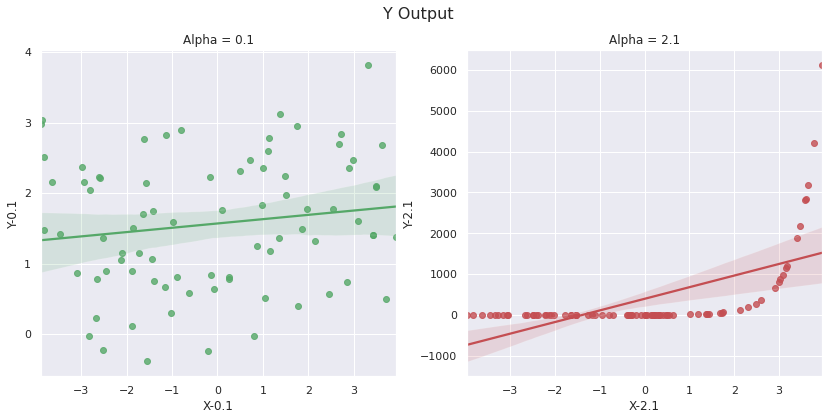

In [ ]:
Q2c =pd.DataFrame({'0.1_y_predicted' : pd.Series(training_dict[0.1]['y_predicted'].reshape(1,80).flatten()),'Y-0.1': df.loc[:,0.1].iloc[:,1],'X-0.1': df.loc[:,0.1].iloc[:,0],'X-2.1': df.loc[:,2.1].iloc[:,0],
                 '2.1_y_predicted' : pd.Series(training_dict[2.1]['y_predicted'].reshape(1,80).flatten()),'Y-2.1': df.loc[:,2.1].iloc[:,1]})
sns.set(rc={"figure.figsize": (14, 6)})
fig,axes=plt.subplots(1,2)
fig.suptitle("Y Output", fontsize=16)
axes[0].set_title('Alpha = 0.1')
sns.regplot(x = 'X-0.1', y= 'Y-0.1', data=Q2c,ax=axes[0],color='g')
plt.grid(True)
axes[1].set_title('Alpha = 2.1')
sns.regplot(x = 'X-2.1', y= 'Y-2.1', data=Q2c ,ax=axes[1],color='r')
plt.show()

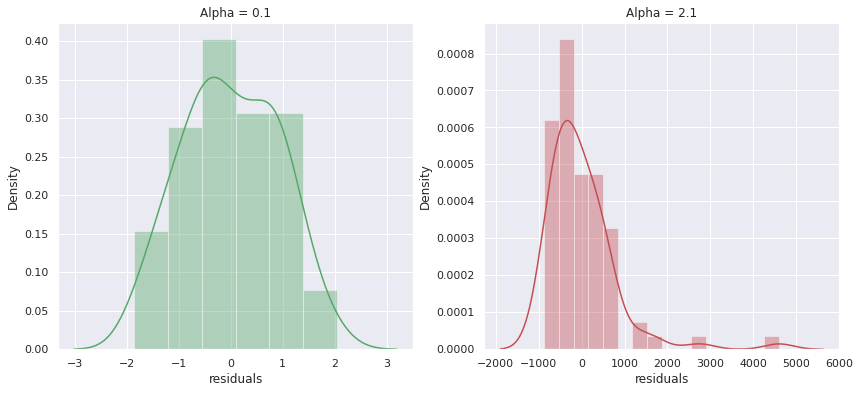

In [ ]:
sns.set(rc={"figure.figsize": (14, 6)})
fig,axes=plt.subplots(1,2)
axes[0].set_title('Alpha = 0.1')
sns.distplot(Q2c['Y-0.1'] - Q2c['0.1_y_predicted'],ax=axes[0],axlabel = 'residuals',color = 'g')
plt.grid(True)
axes[1].set_title('Alpha = 2.1')
sns.distplot(Q2c['Y-2.1'] - Q2c['2.1_y_predicted'],ax=axes[1],axlabel = 'residuals',color = 'r')
plt.show()

### Q3

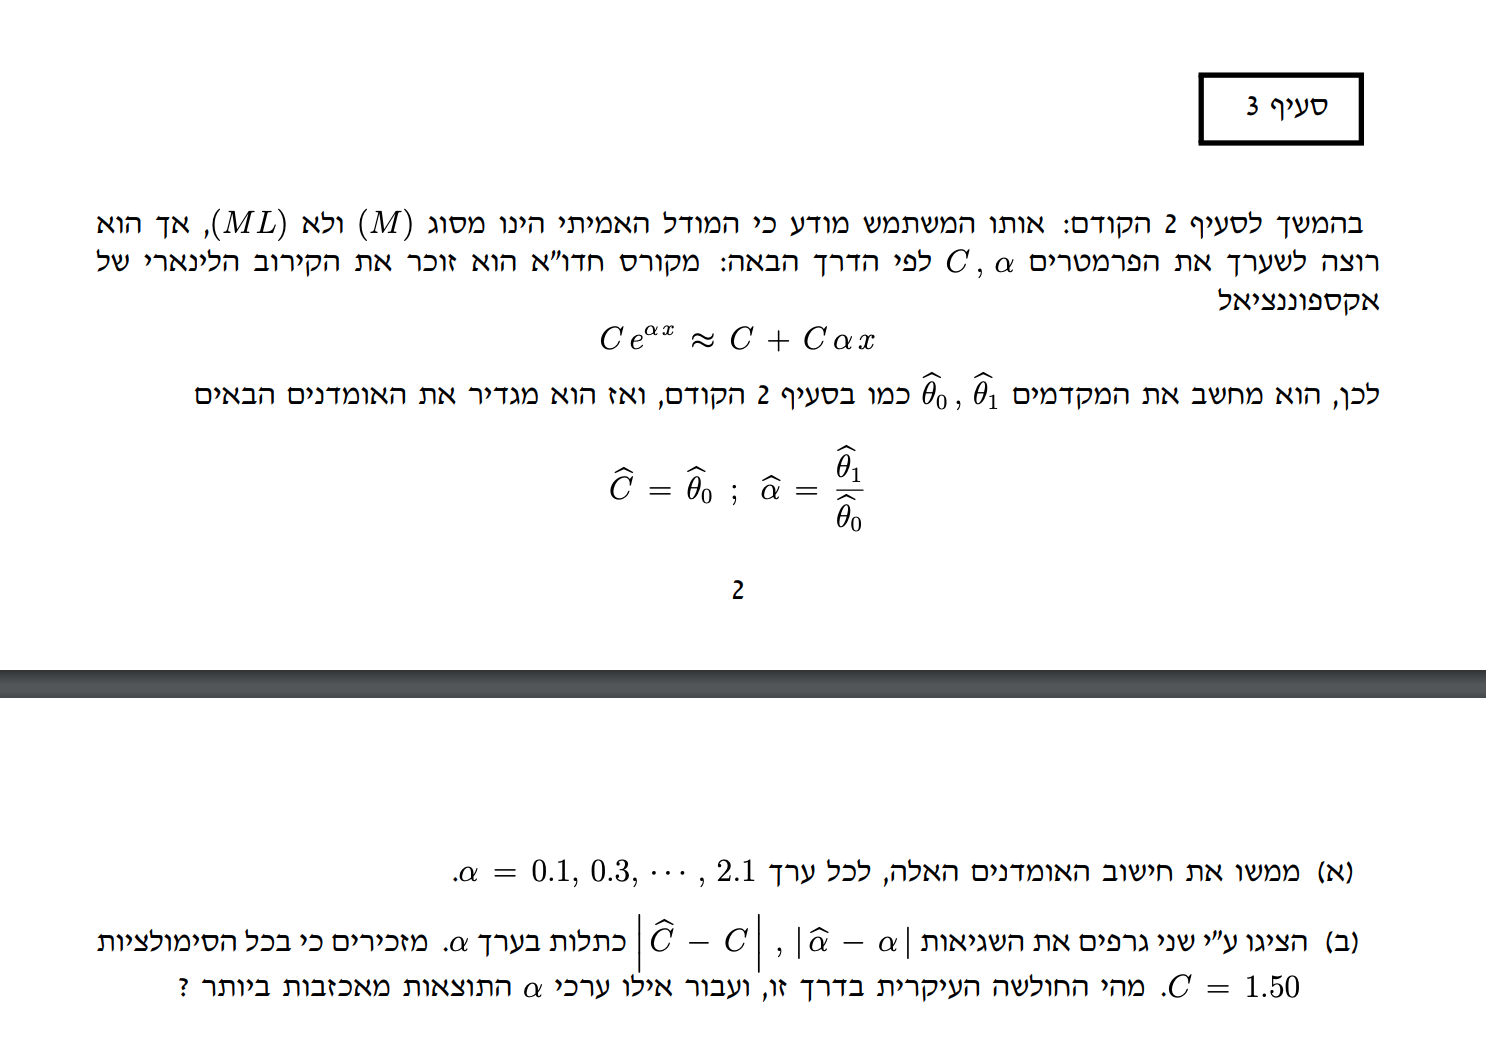

#### 3.a)

In [ ]:
# create dataframe from training_dict dictionary in question 2.a
Q3_df = pd.DataFrame.from_dict(training_dict,orient='index',columns=['θ0', 'θ1','alpha'])
# estimators calculation
Q3_df['alpha^'] = (Q3_df['θ1'] / Q3_df['θ0'])
Q3_df['C^'] = Q3_df['θ0']
Q3_df = Q3_df[['C^','alpha^','alpha']]
Q3_df['|C^-C|'] = abs(Q3_df['C^'] - C)
Q3_df['|alpha^-alpha|'] = abs(Q3_df['alpha^'] - Q3_df['alpha'])
# show table
Q3_df[['C^','alpha^']]

C^    alpha^
0.1    1.570869  0.038907
0.3    1.900467  0.272849
0.5    2.593308  0.382372
0.7    3.885306  0.446957
0.9    6.680662  0.665486
1.1   12.139410  0.884715
1.3   19.567522  0.735430
1.5   44.144886  0.598753
1.7  103.414247  0.593143
1.9  169.384112  0.658471
2.1  393.791924  0.723001

#### 3.b)

In [ ]:
Q3_df = Q3_df.reset_index(drop=True)
Q3_df

C^    alpha^  alpha      |C^-C|  |alpha^-alpha|
0     1.570869  0.038907    0.1    0.070869        0.061093
1     1.900467  0.272849    0.3    0.400467        0.027151
2     2.593308  0.382372    0.5    1.093308        0.117628
3     3.885306  0.446957    0.7    2.385306        0.253043
4     6.680662  0.665486    0.9    5.180662        0.234514
5    12.139410  0.884715    1.1   10.639410        0.215285
6    19.567522  0.735430    1.3   18.067522        0.564570
7    44.144886  0.598753    1.5   42.644886        0.901247
8   103.414247  0.593143    1.7  101.914247        1.106857
9   169.384112  0.658471    1.9  167.884112        1.241529
10  393.791924  0.723001    2.1  392.291924        1.376999

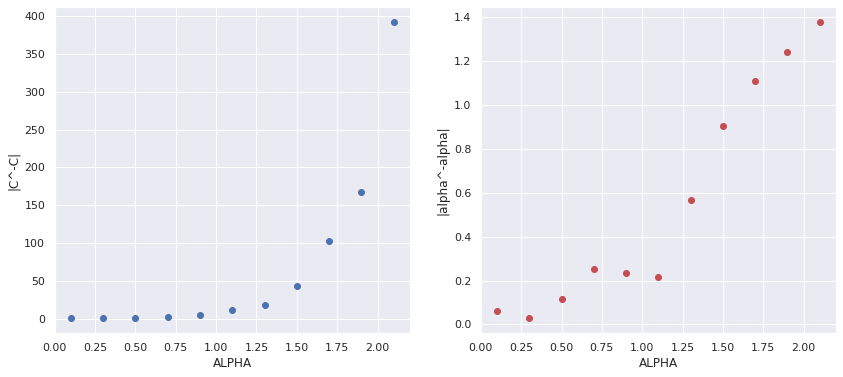

In [ ]:
sns.set(rc={"figure.figsize": (14, 6)})
fig,axes=plt.subplots(1,2)
axes[0].set_xlabel('ALPHA')
axes[0].set_ylabel('|C^-C|')
axes[0].scatter(Q3_df.alpha, Q3_df['|C^-C|'])
plt.grid(True)
axes[1].set_xlabel('ALPHA')
axes[1].set_ylabel('|alpha^-alpha|')
axes[1].scatter(Q3_df.alpha, Q3_df['|alpha^-alpha|'],color = 'r')
plt.show()

The point at the bottom of the vertical red bar has coordinates (x,f(x)); the point at the top is (x,La(x)). As x gets close to a, this red bar shrinks, and so the distance between f(x) and La(x) shrinks. In other words, the value La(x) is a good approximation to f(x), but Only around a certain point, and in our question, he approximates the function around 0, so at numbers that aren't close, the error increases, and if the function output increases the error increases even more.
Moreover, when we try to decide which of the lines is the best one, we consider the line that give us the lowest MSE, and as we know, this fuction punish us at high errors so when the error increses to more then one (highly occured when variance of y increases) the prediction is less representative. 

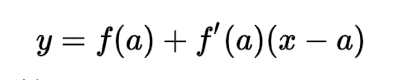
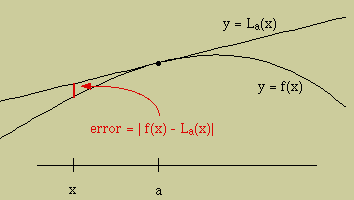



### Q4

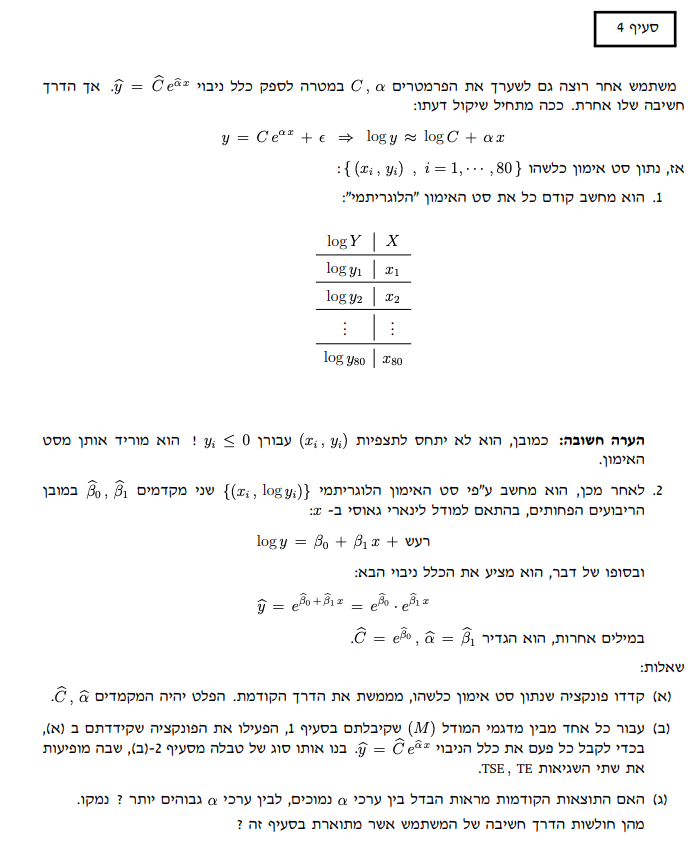

#### 4.a)

In [ ]:

def Q4_learning_model(model):
    """Create multiple linear models for each training set with log y results
      Parameters
      ----------
      dataFrame : model
          Set of training set contained X,logY,Fx columns
        
      Returns
      -------
      dictionary
      a dictionary of dictionaries with alpha as primer key for each dictionary and all the data model for each alpha store as a value

     """

    # create new dictionary
    trainind_dict_Q4 = {}

    #creating the logY  data
    model['log_y'] = model['Y'].apply(lambda x: np.log(x))

    #deleting logY when Y <= 0
    model = model.dropna()

    # generate a linear model with MSE as loss function
    lm = LinearRegression()

    # turning each column to a vector
    data_length = len(model['X'])
    yQ4 = model['Y'].to_numpy().reshape(data_length,1)
    xQ4 = model['X'].to_numpy().reshape(data_length,1)
    log_yQ4 = model['log_y'].to_numpy().reshape(data_length,1)
    Fx = model['Fx'].to_numpy().reshape(data_length,1)

    # fit tha best line
    lm.fit(xQ4,log_yQ4)

  
    #store the intercept
    B0 = lm.intercept_
    B1 =  float(lm.coef_)

    #finding the new C
    C = float(np.exp(B0))

    # store all the prediction points
    y_predictions = C*(np.exp(B1*xQ4))
    
    # entering new elemnts into training_dict
    return {'C^': C,'Alpha^': B1,'TSE':(np.sum((yQ4 - y_predictions)**2))/data_length,'TE': np.mean((Fx-y_predictions)**2) + sigma**2}


In [ ]:
# implement Q4_learning_model function with 0.1 for example
training_dict = Q4_learning_model(df[2.1].iloc[:,])
C = training_dict['C^']
Alpha = training_dict['Alpha^']
print(f"C^ = {C}, Alpha^ = {Alpha}")
print(f"y^ = {C} * e^({Alpha}*x)")

C^ = 5.2457282574285795, Alpha^ = 1.41219978968929
y^ = 5.2457282574285795 * e^(1.41219978968929*x)


#### 4.b)

In [ ]:
trainind_dict_Q4 = {}
# use Q4_learning_model function for each training set
for alpha in alphas:
  trainind_dict_Q4[alpha] = Q4_learning_model(df[alpha].iloc[:,])

Q4 = pd.DataFrame.from_dict(trainind_dict_Q4,orient='index',columns=['TSE', 'TE'])

Q4

TSE             TE
0.1       0.766295       1.079114
0.3       0.741520       1.001152
0.5       1.842001       2.427111
0.7       4.507994       4.883494
0.9      17.693799      18.385580
1.1     102.255788     100.105499
1.3     860.030735     863.665823
1.5    3975.180903    3987.830362
1.7   43741.660728   43624.852185
1.9  142738.942598  142813.303380
2.1  819980.008993  819552.049608

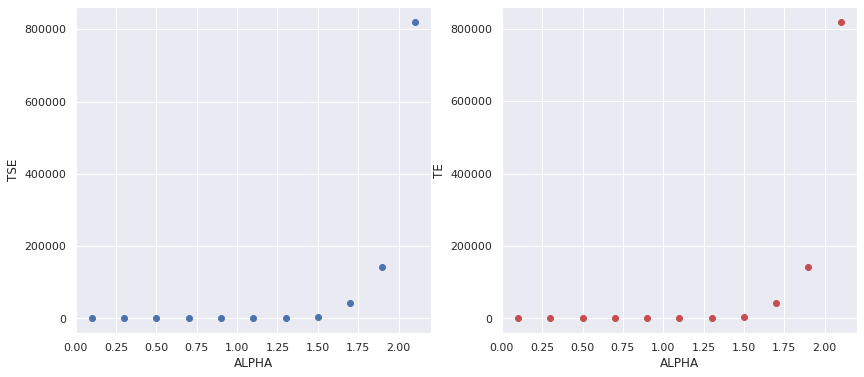

In [ ]:
Q4 = pd.DataFrame.from_dict(trainind_dict_Q4,orient='index',columns=['TSE', 'TE']).reset_index()
Q4=Q4.rename(columns={"index":'Alpha' })
sns.set(rc={"figure.figsize": (14, 6)})
fig,axes=plt.subplots(1,2)
axes[0].set_xlabel('ALPHA')
axes[0].set_ylabel('TSE')
axes[0].scatter(Q4.Alpha, Q4.TSE)
plt.grid(True)
axes[1].set_xlabel('ALPHA')
axes[1].set_ylabel('TE')
axes[1].scatter(Q4.Alpha, Q4.TE,color = 'r')
plt.show()

We observe on the lower alpha (0.1-0.7) a small errors, but on the higher alpha (0.9-2.1) we see a significant errors .This result can be attributed to the more rapid exponential growth of the model.
We believe that this is a weakness of this model.
This model has the same exponential growth pattern as Q2, but the TE and TSE is smaller than Q2.
In this case, we've been tried to find the best linear line that predicts the F(x) = ln(C) + Alpha*X function and then use it for the exp(x) function.
This approach's problem is that in higher X values, the true y values increased exponentially, but the prediction grows in ln rate what predicts high values of X more difficult to observe. for exampla:




In [ ]:
def predictionPoints(df,alpha):
  """Create  linear models for  training set with log y results
  Parameters
  ----------
  dataFrame : df
      data frame contained X,logY,Fx columns for each alpha variable
  float : alpha
      alpha constant from this list : [0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9,2.1] 
    
  Returns
  -------
  Void
      demonstrate the diference between Y and Y_predictions for specific data frame
  """
  model = df[alpha].iloc[:,]

  #creating the logY  data
  model['log_y'] = model['Y'].apply(lambda x: np.log(x))

  #deleting logY when Y <= 0
  model = model.dropna()

  # generate a linear model with MSE as loss function
  lm = LinearRegression()

  # turning each column to a vector
  data_length = len(model['X'])
  yQ4 = model['Y'].to_numpy().reshape(data_length,1)
  xQ4 = model['X'].to_numpy().reshape(data_length,1)
  log_yQ4 = model['log_y'].to_numpy().reshape(data_length,1)
  Fx = model['Fx'].to_numpy().reshape(data_length,1)

  # fit tha best line
  lm.fit(xQ4,log_yQ4)


  #store the intercept
  B0 = lm.intercept_
  B1 =  float(lm.coef_)

  #finding the new C
  C = float(np.exp(B0))

  # store all the prediction points
  y_predictions = C*(np.exp(B1*xQ4))

  plt.plot(xQ4, yQ4, 'ro')
  plt.plot(xQ4, y_predictions, 'bo')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title(f"Alpha = {alpha}")
  red_patch = mpatches.Patch(color='red', label='Y')
  blue_patch = mpatches.Patch(color='blue', label='Y Prediction')
  plt.legend(handles=[red_patch,blue_patch],fancybox=True, loc='upper left', framealpha=1, shadow=True, borderpad=1)

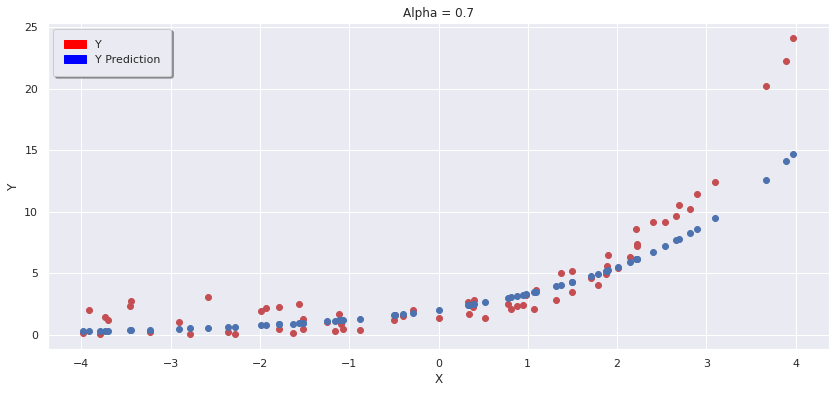

In [ ]:
predictionPoints(df,0.7)


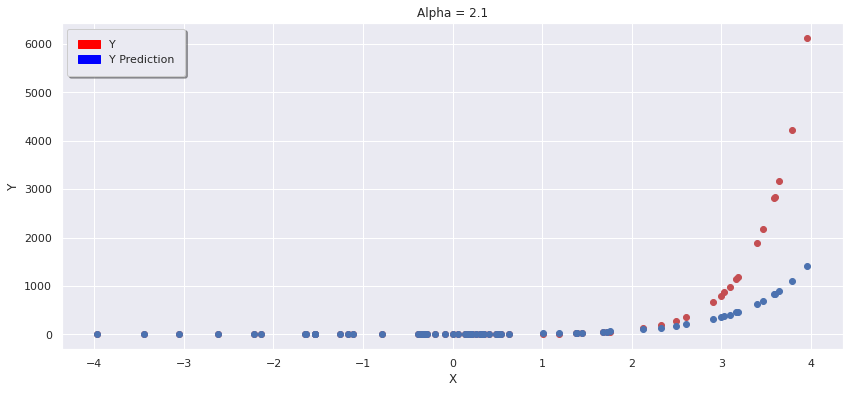

In [ ]:
predictionPoints(df,2.1)
